# Statistical Analysis Project

1. Explore data and understand what the fields mean. Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

2. Examine the relationships between the sales price and other features in the dataset. Use data visualization techniques to help you gain intuitive understanding of the relationships.

3. Make informed guess on which features should be investigated in depth.

4. Data cleaning & manipulation. Apply the following techniques as appropriate:
    * Adjust skewed data distribution.
    * Remove columns with high proportion of missing values.
    * Remove records with missing values.
    * Feature reduction.
    * Convert categorical data to numerical.


5. Compute field relationship scores with the chosen statistical model.

6. Present your findings in statistical summary and/or data visualizations.

7. Apply iterative data analysis process: set expectations, collect information, react to data/revise expectations

Goal: do an analysis of the dataset and the columns that are most correlated to the price field by using the statistical tools introduced during class.

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import linregress 
import statsmodels.api as sm

import pandas_profiling

# Explore data & perfom data cleaning:

In [350]:
train = pd.read_csv('../train.csv')

In [351]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [352]:
# Importing a reference file with column names and explanation (to use in case it's difficult to understand 
# what's represented in certain columns):
column_info = pd.read_csv('../column_explanation.csv')
column_info.head()

Column                                   Explanation
0   MSSubClass                            The building class
1     MSZoning             The general zoning classification
2  LotFrontage   Linear feet of street connected to property
3      LotArea                       Lot size in square feet
4       Street                           Type of road access

In [440]:
column_info[column_info['Column']=='FullBath']

Column                  Explanation
48  FullBath   Full bathrooms above grade

In [403]:
train.profile_report(title='Summary of data') 

In [360]:
# Check null values in all of the data columns:
print(train.shape)

null_values = train.isnull().sum()
null_values[null_values>0]

(1460, 78)


LotFrontage      259
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [355]:
# Drop columns with biggest proportion of missing values:
train = train.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1)

# Examine the relationships between the sales price and other features in the dataset. Continue data cleaning.

In [356]:
# Most correlated numeric fields to SalesPrice are:
top_corr = train.corr()['SalePrice'].sort_values(ascending=False).head(11)
top_corr[1:]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [326]:
# Check for missing values for the top correlated fields:
train[top_corr.keys()].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [328]:
train[list(top_corr.keys()[1:])].describe()

OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      6.099315  1515.463699     1.767123   472.980137  1057.429452   
std       1.382997   525.480383     0.747315   213.804841   438.705324   
min       1.000000   334.000000     0.000000     0.000000     0.000000   
25%       5.000000  1129.500000     1.000000   334.500000   795.750000   
50%       6.000000  1464.000000     2.000000   480.000000   991.500000   
75%       7.000000  1776.750000     2.000000   576.000000  1298.250000   
max      10.000000  5642.000000     4.000000  1418.000000  6110.000000   

          1stFlrSF     FullBath  TotRmsAbvGrd    YearBuilt  YearRemodAdd  
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000  
mean   1162.626712     1.565068      6.517808  1971.267808   1984.865753  
std     386.587738     0.550916      1.625393    30.202904     20.645407  
min     334.000000     0.000000      2.000000  1872.000000   1950.000000  
25%     882.000000     1.000000      5.000000  1954.000000   1967.000000  
50%    1087.000000     2.000000      6.000000  1973.000000   1994.000000  
75%    1391.250000     2.000000      7.000000  2000.000000   2004.000000  
max    4692.000000     3.000000     14.000000  2010.000000   2010.000000

Two main measures of central tendency: mean and the median (50th percentile). If they are close in value, it means that the data is symmetrically distributed around the mean. 
If the mean greater than the median, data is right skewed. If the median greater than the mean, the data is left skewed. Example, a very large mean compared to the median means that there are a few outliers that influence the mean and cause the data to be skewed. Need to consider removing them.

GarageCars, GarageArea, TotalBsmtSF and FullBath have 0 values as minimum value. If we check in the profiling table above, we see that there are 0 values in these fields, but what we can deduct is that 0 means that there's no such feature in the current appartment. Meaning that there's no garage, no basement, and for some even no bathroom above grade. So we won't be touching these values. Moreover the highest ratio for 0 values is for GarageCars and GarageArea, which represent 5.5% of total data.

Text(0, 0.5, 'Sale Price')

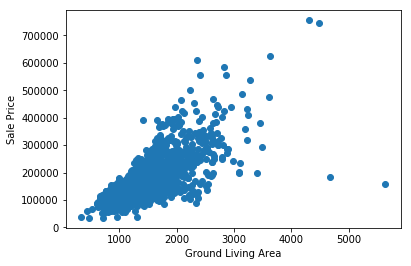

In [329]:
# Plot top correlated fields that seem to have skewed data:
plt.scatter(x = train.GrLivArea, y = train.SalePrice)
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')

We see that there are few outliers with large above ground living area, but low price. We can remove these.

In [330]:
GrLivArea_drop = train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index
train = train.drop(GrLivArea_drop, axis=0)

Text(0, 0.5, 'Sale Price')

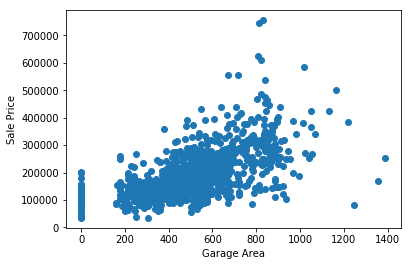

In [331]:
# Plot GarageCars:
plt.scatter(x = train.GarageArea, y = train.SalePrice)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

There seem to be few outliers that have great Garage Area, but the Sale Price doesn't go up. We will remove these as well.

In [332]:
GrLivArea_drop = train[(train['GarageArea']>1200)&(train['SalePrice']<300000)].index
train = train.drop(GrLivArea_drop, axis=0)

Create categories (bins) for YearBuilt and YearRemodAdd columns:

In [412]:
train.YearBuilt.min(), train.YearBuilt.max()

(1872, 2010)

In [428]:
year_labels = ['>1900', '1900-1950', '1951-1980', '1981-2000', '2000-2010']
cutoffs = [1870, 1899, 1950, 1980, 2000, 2011]
train['YearBuiltBinned'] = pd.cut(train.YearBuilt, cutoffs, labels=year_labels)

In [429]:
train.YearRemodAdd.min(), train.YearRemodAdd.max()

(1950, 2010)

In [430]:
train['YearRemodAddBinned'] = pd.cut(train.YearRemodAdd, cutoffs, labels=year_labels)

# Make informed guess on which categorical features should be investigated in depth. Convert categorical data to numerical.
Manage categorical fields:
    - remove the categorical fields that have less meaning
    - remove records with missing values?
    - one hot encoding: for categorical variables
    - pd.get_dummies(df), ..
    - feature selection: lasso, stepwise..

In [ ]:
train['Neighborhood', 'Condition1', 'HouseStyle', 'KitchenQual']

# newly added bins, replace the numerical fields with these:
train['YearBuiltBinned', 'YearRemodAddBinned']

In [ ]:
??

# Use Feature reduction, PCA

In [ ]:
??

# Compute field relationship scores with the chosen statistical model.  

Use linear regression & Present your findings in statistical summary and/or data visualizations:

In [438]:
X = sm.add_constant(train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
                           'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']])

Y = train.SalePrice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:37:12   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187   

Rvalue is 0.77, which means that the model captures almost 80% of the data. Other comments ??

In [ ]:
??